Generate the shallow synthetic tensors $X_{synth -lang}.npy$

In [0]:
import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


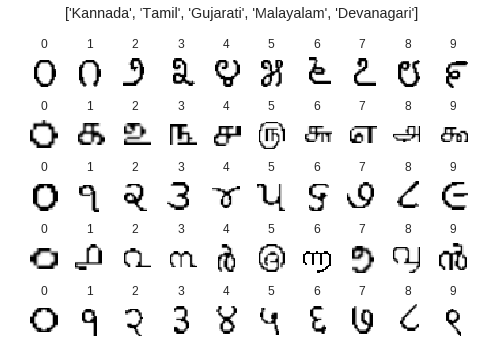

In [2]:
from tqdm import tqdm_notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
##
from google.colab import drive
drive.mount('/gdrive')
import os
os.chdir('/gdrive/My Drive/Colab Notebooks/Uni_MNIST')
from PIL import Image,ImageFont, ImageDraw
dict_seeds=np.load('dict_seeds.npy')
lang_list=['Kannada', 'Tamil', 'Gujarati', 'Malayalam', 'Devanagari']

X_seeds_all=np.zeros((50,28,28,1))
plt.figure()
c=1
for lang in lang_list:
  
  for i in range(10):
    X_seeds_all[c-1,:,:,0]=dict_seeds.item().get(lang)[i,:,:]
    plt.subplot(5,10,c)
    c+=1
    plt.imshow(dict_seeds.item().get(lang)[i,:,:])
    
    plt.title(i)
    plt.axis('off')

  plt.suptitle(lang_list);

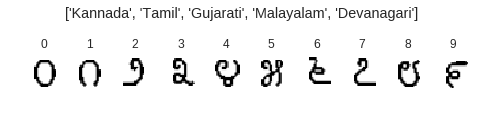

In [3]:
c=1
for i in range(10):
#     X_seeds_all[c-1,:,:,0]=dict_seeds.item().get(lang)[i,:,:]
  plt.subplot(5,10,c)
  c+=1
  plt.imshow(X_seeds_all[i,:,:,0])

  plt.title(i)
  plt.axis('off')

plt.suptitle(lang_list);

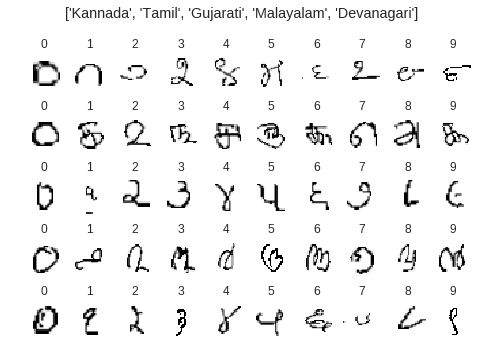

In [4]:
lang_list=['Kannada', 'Tamil', 'Gujarati', 'Malayalam', 'Devanagari']


plt.figure()
c=1
for lang in lang_list:
  X_lang=np.load('X_test_'+lang+'.npy')
  y_lang=np.load('y_test_'+lang+'.npy')
  
  for i in range(10):
    plt.subplot(5,10,c)
    c+=1
    rand_i=np.where(y_lang==i)[0][np.random.choice(128)]  
    plt.imshow(X_lang[rand_i,:,:,0])
    plt.title(i)
    plt.axis('off')

  plt.suptitle(lang_list);

In [0]:
from imgaug import augmenters as iaa

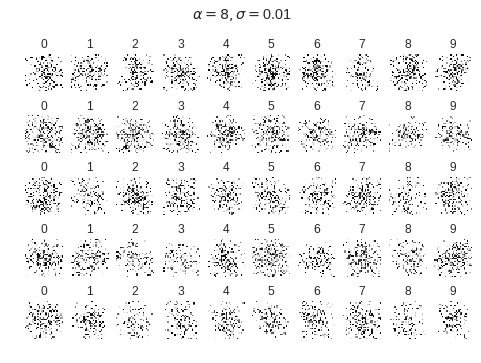

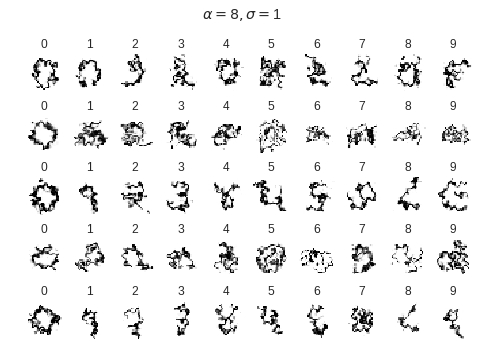

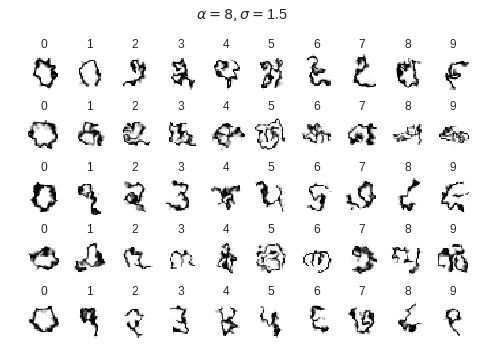

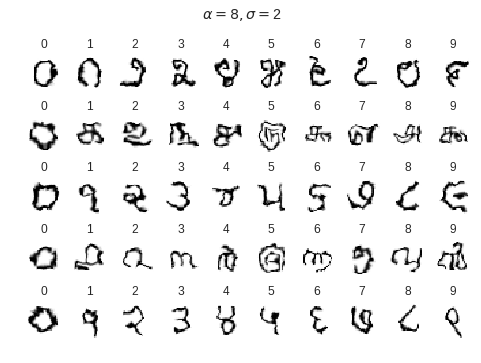

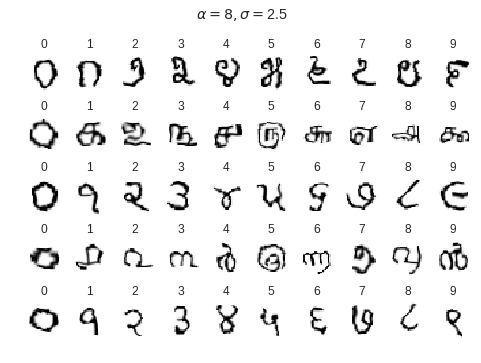

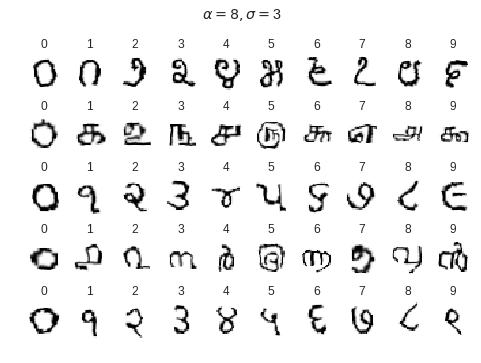

In [6]:
sigma_vec=[0.01, 1, 1.5, 2, 2.5, 3]
for sig in sigma_vec:
  seq = iaa.Sequential([
      iaa.ElasticTransformation(alpha=(8), sigma=sig) # blur images with a sigma of 0 to 3.0
  ])

  images_aug = seq.augment_images(X_seeds_all)  # done by the library
  images_aug=np.clip(images_aug,0,255).astype('uint8')

  c=1
#http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.10.5032&rep=rep1&type=pdf
  plt.figure()
  for i in range(50):
    plt.subplot(5,10,c)
    c+=1
    plt.imshow(images_aug[i,:,:,0])
    plt.title(np.mod(i,10))
    plt.axis('off')
  # plt.tight_layout()
  plt.suptitle(r'$\alpha=8 ,  \sigma=$'+str(sig))



# 
OK. So, we generate tensors for  $\sigma \sim U[1.75,2]$

In [7]:
X_elastic_all=np.zeros((6000,50,28,28,1))
# from tqdm import tqdm_notebook

   
for trial in tqdm_notebook(range(6000)):
  sig=np.random.uniform(1.75,2)
  aug=iaa.ElasticTransformation(alpha=(8), sigma=sig)    
  images_aug = aug.augment_images(X_seeds_all)  # (50 x 28 x 28 x 1)
  X_elastic_all[trial]=np.clip(images_aug,0,255).astype('uint8')
file_name='X_elastic_all_Uniform.npy'
np.save(file_name,X_elastic_all)
  
  

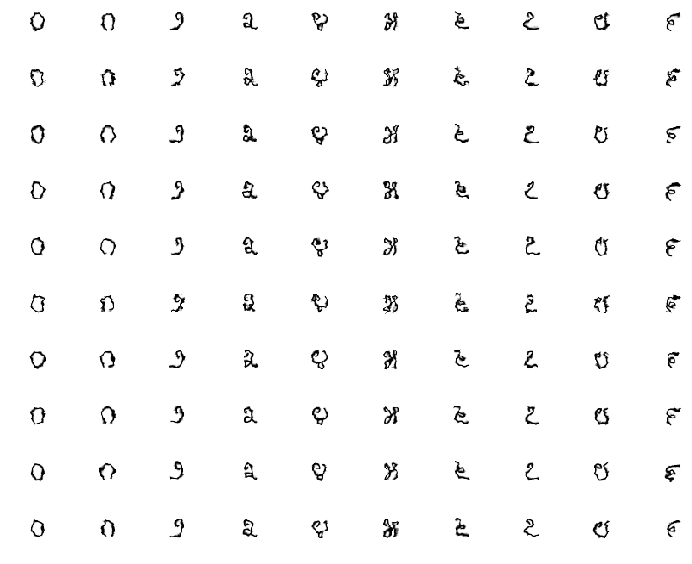

In [8]:
import numpy as np
X_elastic_all_20=np.load('X_elastic_all_Uniform.npy')
X_elastic_kannada=X_elastic_all_20[:,0:10,:,:,0]
X_e_k=X_elastic_kannada.reshape(60000, 28, 28)
plt.figure(figsize=(10,8))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.imshow(X_e_k[i,:,:])
#   plt.title(np.mod(i,10))
  plt.axis('off')
plt.tight_layout()
